#Curso de Desarrollo en Lenguaje Python para Inteligencia Artificial
###Nerea Luis @sailormerqury
### https://nerealuis.es

#Trabajando con mi Red de Neuronas Convolucional

##Importar librerías

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime

In [ ]:
print(tf.__version__)

## Dataset MNIST

 La primera columna contiene la etiqueta de clase. Las columnas restantes contienen los valores de los atributos, uno por píxel para los valores de píxel de `28×28=784`. La mayoría de estos valores de píxel de 784 son cero; es posible que quieras dedicar un minuto a confirmar que no sean *todos* cero.

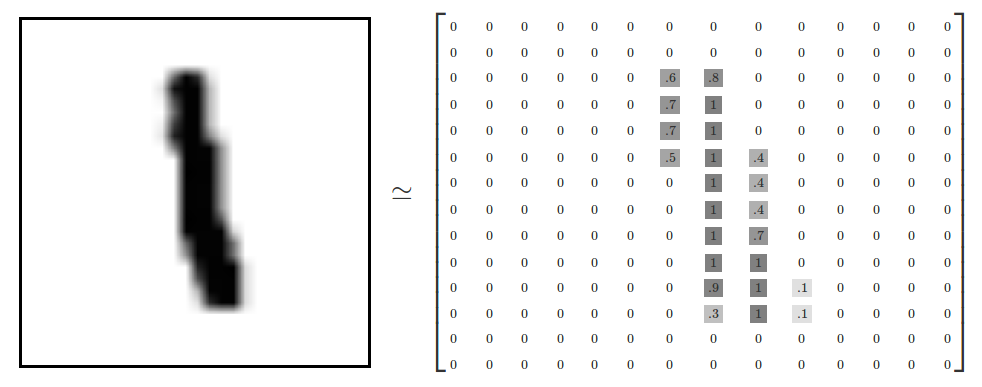

##Cargamos y transformamos los datos

In [ ]:
# Cargamos los datos
data = pd.read_csv('./sample_data/mnist_train_small.csv', header=None)

#Escalamos los datos;
X = data.values[:, 1:].reshape((-1, 28, 28, 1)) / 255

#One-Hot Encoding de los datos
Y = keras.utils.__________

# División de los datos en training y test.
X_train, X_test, Y_train, Y_test = _________________

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

In [ ]:
idx = 100

# Visualizar alguna imagen.
plt.matshow(X_train[idx:(idx+1), :].reshape((28, 28)))
# Hemos mostrado el valor real en el título.
plt.title('Real Number is:' + str(np.argmax(Y_train[idx])))
plt.axis(False)
plt.show()

In [ ]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i])
    digit = Y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

## Modelo de red convolucional

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28,28,1)

model = keras.Sequential(
    [
        keras._____
    ]
)

model.summary() #Resumen de la arquitectura

##Entrenamiento

In [ ]:
batch_size = 
epochs = 

model.compile(loss="__________", optimizer="________", metrics=["____________"])

model.fit(_____________)



##Guardar el modelo

In [ ]:
# Guardar el Modelo
model.save('mnist-model.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
new_model = keras.models.load_model('mnist-model.h5')

##Evaluación del modelo

In [ ]:
score = model.evaluate____________

In [ ]:
# Output a plot of the confusion matrix.

y_pred = model.predict____________

Y_pred = np.argmax_____________
Y_test = np.argmax________________

mat = metrics.____________________-

# Plot Confusion matrix
plt.figure(figsize=(15,15))
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues,fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
x_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    print(Y_test[i])
    print(y_pred[i])
    ax.set(title = f"Real Number is {Y_test[i]}\nPredict Number is {y_pred[i].argmax()}");

## ¿Cómo monitorizar?

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:

batch_size = 128
epochs = 12

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[tensorboard_callback])



In [ ]:
%tensorboard --logdir logs/fit

Para aprender más...

In [ ]:
https://www.kaggle.com/ernie55ernie/mnist-with-keras-visualization-and-saliency-map